<a href="https://colab.research.google.com/github/Kaveriharamagatti/NVIDIA_async_detection/blob/main/Methodology_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

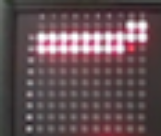

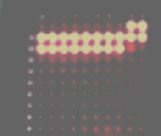

Image saved in the folder: /content/drive/MyDrive/output_nvidia1/output_image.jpg


In [ ]:
#1st image(Preprocessing)
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

# Create output folder if it doesn't exist
output_folder = '/content/drive/MyDrive/output_nvidia1'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Read the input image
input_image = cv2.imread('/content/drive/MyDrive/cropped_ouput/7.png')

# Define the intensity thresholds for each channel (R, G, B)
min_intensity_R = 100
max_intensity_R = 205
min_intensity_G = 100
max_intensity_G = 200
min_intensity_B = 100
max_intensity_B = 150

# Clip intensity values to the defined range for each channel
output_image = input_image.copy()
output_image[:,:,0] = np.clip(output_image[:,:,0], min_intensity_B, max_intensity_B) # Blue channel
output_image[:,:,1] = np.clip(output_image[:,:,1], min_intensity_G, max_intensity_G) # Green channel
output_image[:,:,2] = np.clip(output_image[:,:,2], min_intensity_R, max_intensity_R) # Red channel

# Display the original and contrast-enhanced RGB images
cv2_imshow(input_image)
cv2_imshow(output_image)

# Save the output image
output_path = os.path.join(output_folder, "output_image.jpg")
cv2.imwrite(output_path, output_image)

print("Image saved in the folder:", output_path)


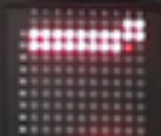

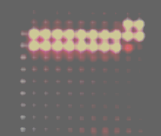

Image saved in the folder: /content/drive/MyDrive/output_nvidia/output_image.jpg


In [ ]:
#2nd image(Preprocessing)
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

# Create output folder if it doesn't exist
output_folder = '/content/drive/MyDrive/output_nvidia'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Read the input image
input_image = cv2.imread('/content/drive/MyDrive/cropped_ouput/8.png')

# Define the intensity thresholds for each channel (R, G, B)
min_intensity_R = 100
max_intensity_R = 205
min_intensity_G = 100
max_intensity_G = 200
min_intensity_B = 100
max_intensity_B = 150

# Clip intensity values to the defined range for each channel
output_image = input_image.copy()
output_image[:,:,0] = np.clip(output_image[:,:,0], min_intensity_B, max_intensity_B) # Blue channel
output_image[:,:,1] = np.clip(output_image[:,:,1], min_intensity_G, max_intensity_G) # Green channel
output_image[:,:,2] = np.clip(output_image[:,:,2], min_intensity_R, max_intensity_R) # Red channel

# Display the original and contrast-enhanced RGB images
cv2_imshow(input_image)
cv2_imshow(output_image)

# Save the output image
output_path = os.path.join(output_folder, "output_image.jpg")
cv2.imwrite(output_path, output_image)

print("Image saved in the folder:", output_path)


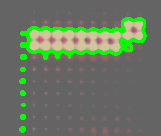

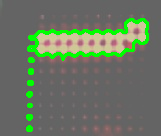

In [ ]:
#Segmenting
from google.colab.patches import cv2_imshow
import cv2
import os

# Function to process image
def process_image(input_image_path1, input_image_path2, output_folder):
    # Read the input images
    input_image1 = cv2.imread(input_image_path1)
    input_image2 = cv2.imread(input_image_path2)

    # Convert the images to grayscale
    gray_image1 = cv2.cvtColor(input_image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(input_image2, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image1 = cv2.GaussianBlur(gray_image1, (5, 5), 0)
    blurred_image2 = cv2.GaussianBlur(gray_image2, (5, 5), 0)

    # Threshold the images to segment high-intensity regions
    _, high_intensity_mask1 = cv2.threshold(blurred_image1, 120, 255, cv2.THRESH_BINARY)
    _, high_intensity_mask2 = cv2.threshold(blurred_image2, 120, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded images
    contours1, _ = cv2.findContours(high_intensity_mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(high_intensity_mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original images
    output_image1 = input_image1.copy()
    output_image2 = input_image2.copy()
    cv2.drawContours(output_image1, contours1, -1, (0, 255, 0), 2)
    cv2.drawContours(output_image2, contours2, -1, (0, 255, 0), 2)

    # Save the output images
    output_path1 = os.path.join(output_folder, "output_image1.jpg")
    output_path2 = os.path.join(output_folder, "output_image2.jpg")
    cv2.imwrite(output_path1, output_image1)
    cv2.imwrite(output_path2, output_image2)

    # Display the segmented images
    cv2_imshow(output_image1)
    cv2_imshow(output_image2)

# Paths to the input images and output folder
input_image_path1 = '/content/drive/MyDrive/output_nvidia/output_image.jpg'
input_image_path2 = '/content/drive/MyDrive/output_nvidia1/output_image.jpg'
output_folder = '/content/drive/MyDrive/output_nvidia'

# Process the images and save the output
process_image(input_image_path1, input_image_path2, output_folder)


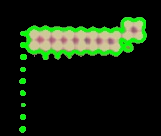

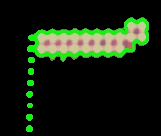

In [ ]:
#REMOVING BACKGROUND
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

def segment_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform image thresholding (adjust parameters as needed)
    _, thresholded_image = cv2.threshold(blurred_image, 118, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to retain only the segmented part
    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, contours, -1, (255), cv2.FILLED)

    # Apply the mask to the original image to extract the segmented part
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    return segmented_image

def main():
    # Path to the input images
    image_path = '/content/drive/MyDrive/output_nvidia/output_image1.jpg'
    image_path1 = '/content/drive/MyDrive/output_nvidia/output_image2.jpg'

    # Perform image segmentation
    segmented_image = segment_image(image_path)
    segmented_image1 = segment_image(image_path1)

    # Display the segmented images
    cv2_imshow(segmented_image)
    cv2_imshow(segmented_image1)

    # Create a folder to save the segmented images
    output_folder = '/content/drive/MyDrive/output_nvidia1'
    os.makedirs(output_folder, exist_ok=True)

    # Save the segmented images
    cv2.imwrite(os.path.join(output_folder, 'segmented_image1.jpg'), segmented_image)
    cv2.imwrite(os.path.join(output_folder, 'segmented_image2.jpg'), segmented_image1)

if __name__ == "__main__":
    main()


In [ ]:
#comparing based on contours
import cv2
import numpy as np

# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/output_nvidia1/segmented_image1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/output_nvidia1/segmented_image2.jpg')

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the images
_, thresh1 = cv2.threshold(gray1, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(gray2, 127, 255, cv2.THRESH_BINARY)

# Find contours in the segmented images
contours1, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Flag to track if any match is found
match_found = False

# Compare the contours
for i, contour1 in enumerate(contours1):
    for j, contour2 in enumerate(contours2):
        # Calculate the match score between contours
        match_score = cv2.matchShapes(contour1, contour2, cv2.CONTOURS_MATCH_I1, 0)

        # If the match score is below a threshold, consider them as same contours
        if match_score < 0.1:
            print(f"Contour {i+1} in Image 1 matches with Contour {j+1} in Image 2")
            match_found = True
            # You can also get the positions of the contours and compare if needed

# Print the result based on match status
if match_found:
    print("sync")
else:
    print("async")


Contour 1 in Image 1 matches with Contour 1 in Image 2
Contour 1 in Image 1 matches with Contour 2 in Image 2
Contour 1 in Image 1 matches with Contour 3 in Image 2
Contour 1 in Image 1 matches with Contour 4 in Image 2
Contour 1 in Image 1 matches with Contour 5 in Image 2
Contour 1 in Image 1 matches with Contour 6 in Image 2
Contour 1 in Image 1 matches with Contour 8 in Image 2
Contour 2 in Image 1 matches with Contour 1 in Image 2
Contour 2 in Image 1 matches with Contour 2 in Image 2
Contour 2 in Image 1 matches with Contour 3 in Image 2
Contour 2 in Image 1 matches with Contour 4 in Image 2
Contour 2 in Image 1 matches with Contour 5 in Image 2
Contour 2 in Image 1 matches with Contour 6 in Image 2
Contour 2 in Image 1 matches with Contour 8 in Image 2
Contour 3 in Image 1 matches with Contour 1 in Image 2
Contour 3 in Image 1 matches with Contour 2 in Image 2
Contour 3 in Image 1 matches with Contour 3 in Image 2
Contour 3 in Image 1 matches with Contour 5 in Image 2
Contour 3 